# Check Umiujac TUNDRA validation files

Downloaded from https://doi.pangaea.de/10.1594/PANGAEA.964743 the 27/02/2024 by Mickaël Lalande

- Article (Lackner et al., 2022) : https://tc.copernicus.org/articles/16/3357/2022/
- Données : https://doi.pangaea.de/10.1594/PANGAEA.964743 (updated by Florent)

CLASSIC forcing: https://cccma.gitlab.io/classic/basicInputs.html

Coverage:	LATITUDE: 56.559167 * LONGITUDE: -76.482056
	DATE/TIME START: 2012-09-28T04:00:00 * DATE/TIME END: 2021-10-15T21:00:00
	MINIMUM ELEVATION: 133.0 m * MAXIMUM ELEVATION: 133.0 m
Event(s):	Umiujaq_2012-2021_Tundra * LATITUDE: 56.559167 * LONGITUDE: -76.482056 * DATE/TIME START: 2012-09-28T17:00:00 * DATE/TIME END: 2021-10-19T10:00:00 * ELEVATION: 133.0 m * LOCATION: Hudson Bay * METHOD/DEVICE: Field measurement

In [1]:
# Env: sc2_v0

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures

## Umiujaq tundra, northeastern Canada

In [2]:
path_obs = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Umiujaq/Domine-etal_2024/datasets'
df_sd = pd.read_csv(path_obs+'/Umiujaq_snow_height.tab', skiprows=26, delimiter='\t', parse_dates=['Date/Time'], index_col=['Date/Time'])
df_sd

,Event,Snow h [m]
Date/Time,,
2012-09-28 21:00:00,Umiujaq_2012-2021_Tundra,0.000
2012-09-28 22:00:00,Umiujaq_2012-2021_Tundra,0.000
2012-09-28 23:00:00,Umiujaq_2012-2021_Tundra,0.000
2012-09-29 00:00:00,Umiujaq_2012-2021_Tundra,0.000
2012-09-29 01:00:00,Umiujaq_2012-2021_Tundra,0.000
...,...,...
2021-10-19 09:00:00,Umiujaq_2015-2021_Forest,0.053
2021-10-19 10:00:00,Umiujaq_2015-2021_Forest,0.034
2021-10-19 11:00:00,Umiujaq_2015-2021_Forest,0.439


In [3]:
# Find index limit forest/tundra
i_lim = 79338
df_sd['Event'][:i_lim+2]

Date/Time
2012-09-28 21:00:00    Umiujaq_2012-2021_Tundra
2012-09-28 22:00:00    Umiujaq_2012-2021_Tundra
2012-09-28 23:00:00    Umiujaq_2012-2021_Tundra
2012-09-29 00:00:00    Umiujaq_2012-2021_Tundra
2012-09-29 01:00:00    Umiujaq_2012-2021_Tundra
                                 ...           
2015-11-26 05:00:00    Umiujaq_2012-2021_Tundra
2015-11-26 06:00:00    Umiujaq_2012-2021_Tundra
2015-11-26 07:00:00    Umiujaq_2012-2021_Tundra
2015-11-26 08:00:00    Umiujaq_2015-2021_Forest
2015-11-26 09:00:00    Umiujaq_2015-2021_Forest
Name: Event, Length: 79340, dtype: object

In [4]:
site = 'umt'
site_longname = 'Umiujaq TUNDRA, northeastern Canada'

year_start = '2012'
year_end = '2021'
ds_forcing = xr.open_dataset(path_obs+'/met_insitu_'+site+'_'+year_start+'_'+year_end+'.nc')
ds_forcing

<xarray.Dataset>
Dimensions:    (time: 79403)
Coordinates:
  * time       (time) datetime64[ns] 2012-09-28 ... 2021-10-19T10:00:00
Data variables:
    Rainf      (time) float64 ...
    Snowf      (time) float64 ...
    TotPrecip  (time) float64 ...
    SWdown     (time) float64 ...
    LWdown     (time) float64 ...
    Tair       (time) float64 ...
    Wind       (time) float64 ...
    Psurf      (time) float64 ...
    Qair       (time) float64 ...

In [5]:
site_longname

'Umiujaq TUNDRA, northeastern Canada'

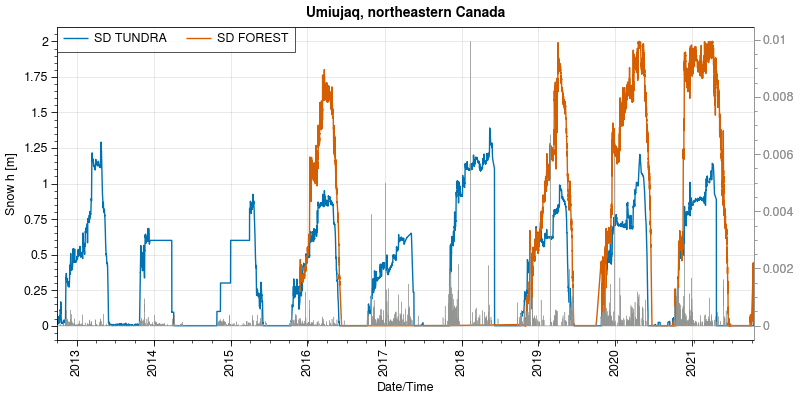

In [6]:
%matplotlib widget
fig, axs = pplt.subplots(figsize=(8,4))

period=slice('2019-09', '2019-12')

ax = axs[0]
ax.plot(df_sd['Snow h [m]'][:79338-4], label='SD TUNDRA', lw=1)
ax.plot(df_sd['Snow h [m]'][79338:], label='SD FOREST', lw=1)

ox = ax.alty(color='gray')
ox.plot(ds_forcing.Snowf, label='Precip', color='gray', lw=0.2)

# ax.format(xlim=(ds_forcing.sel(time='2019-09-01').time[0], ds_forcing.sel(time='2019-12-01').time[0]),
#          ylim=(0, 1))

# ox.format(ylim=(0, 0.006))
fig.suptitle('Umiujaq, northeastern Canada')

ax.legend()

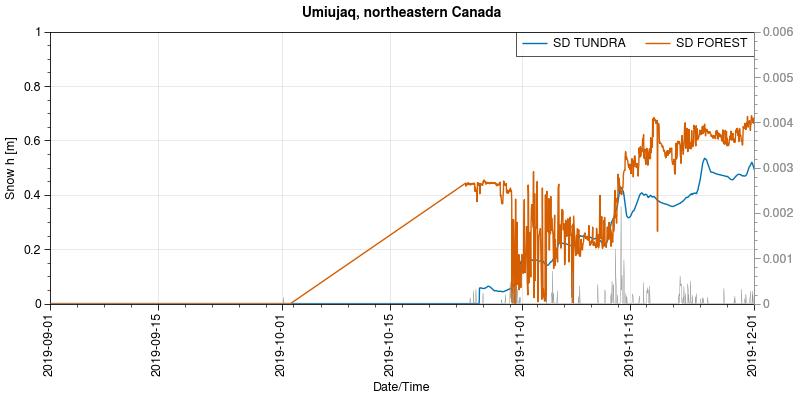

In [7]:
%matplotlib widget
fig, axs = pplt.subplots(figsize=(8,4))

period=slice('2019-09', '2019-12')

ax = axs[0]
ax.plot(df_sd['Snow h [m]'][:79338-4], label='SD TUNDRA', lw=1)
ax.plot(df_sd['Snow h [m]'][79338:], label='SD FOREST', lw=1)

ox = ax.alty(color='gray')
ox.plot(ds_forcing.Snowf, label='Precip', color='gray', lw=0.2)

ax.format(xlim=(ds_forcing.sel(time='2019-09-01').time[0], ds_forcing.sel(time='2019-12-01').time[0]),
         ylim=(0, 1))

ox.format(ylim=(0, 0.006))
fig.suptitle('Umiujaq, northeastern Canada')

ax.legend()

In [8]:
df_tundra = df_sd[:79338-4]
df_forest = df_sd[79338:]

In [9]:
df_tundra

,Event,Snow h [m]
Date/Time,,
2012-09-28 21:00:00,Umiujaq_2012-2021_Tundra,0.0000
2012-09-28 22:00:00,Umiujaq_2012-2021_Tundra,0.0000
2012-09-28 23:00:00,Umiujaq_2012-2021_Tundra,0.0000
2012-09-29 00:00:00,Umiujaq_2012-2021_Tundra,0.0000
2012-09-29 01:00:00,Umiujaq_2012-2021_Tundra,0.0000
...,...,...
2021-10-19 06:00:00,Umiujaq_2012-2021_Tundra,0.0587
2021-10-19 07:00:00,Umiujaq_2012-2021_Tundra,0.0585
2021-10-19 08:00:00,Umiujaq_2012-2021_Tundra,0.0579


In [10]:
df_forest

,Event,Snow h [m]
Date/Time,,
2015-11-26 08:00:00,Umiujaq_2015-2021_Forest,0.249
2015-11-26 09:00:00,Umiujaq_2015-2021_Forest,0.251
2015-11-26 10:00:00,Umiujaq_2015-2021_Forest,0.256
2015-11-26 11:00:00,Umiujaq_2015-2021_Forest,0.256
2015-11-26 12:00:00,Umiujaq_2015-2021_Forest,0.255
...,...,...
2021-10-19 09:00:00,Umiujaq_2015-2021_Forest,0.053
2021-10-19 10:00:00,Umiujaq_2015-2021_Forest,0.034
2021-10-19 11:00:00,Umiujaq_2015-2021_Forest,0.439


In [11]:
ds_tundra = df_tundra.drop(columns='Event').to_xarray()
ds_tundra = ds_tundra.rename({'Date/Time': 'time', 'Snow h [m]': 'snd_auto'})
ds_tundra.snd_auto.attrs = {'name': 'Snow h', 'unit': 'm'}
ds_tundra.attrs = {
    'event': 'Umiujaq_2012-2021_Tundra',
    'link': 'https://doi.pangaea.de/10.1594/PANGAEA.964743',
    'downloaded': '27/02/2024 by Mickaël Lalande',
    'original_file': 'Domine-etal_2024/datasets/Umiujaq_snow_height.tab, Umiujaq_soil_temp_water.tab'
}
ds_tundra

<xarray.Dataset>
Dimensions:   (time: 79334)
Coordinates:
  * time      (time) datetime64[ns] 2012-09-28T21:00:00 ... 2021-10-19T10:00:00
Data variables:
    snd_auto  (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0585 0.0579 0.0575 0.0568
Attributes:
    event:          Umiujaq_2012-2021_Tundra
    link:           https://doi.pangaea.de/10.1594/PANGAEA.964743
    downloaded:     27/02/2024 by Mickaël Lalande
    original_file:  Domine-etal_2024/datasets/Umiujaq_snow_height.tab, Umiuja...

In [12]:
ds_forest = df_forest.drop(columns='Event').to_xarray()
ds_forest = ds_forest.rename({'Date/Time': 'time', 'Snow h [m]': 'snd_auto'})
ds_forest.snd_auto.attrs = {'name': 'Snow h', 'unit': 'm'}
ds_forest.attrs = {
    'event': 'Umiujaq_2015-2021_Forest',
    'link': 'https://doi.pangaea.de/10.1594/PANGAEA.964743',
    'downloaded': '27/02/2024 by Mickaël Lalande',
    'original_file': 'Domine-etal_2024/datasets/Umiujaq_snow_height.tab, Umiujaq_soil_temp_water.tab'
}
ds_forest

<xarray.Dataset>
Dimensions:   (time: 51654)
Coordinates:
  * time      (time) datetime64[ns] 2015-11-26T08:00:00 ... 2021-10-19T13:00:00
Data variables:
    snd_auto  (time) float64 0.249 0.251 0.256 0.256 ... 0.034 0.439 0.045 0.043
Attributes:
    event:          Umiujaq_2015-2021_Forest
    link:           https://doi.pangaea.de/10.1594/PANGAEA.964743
    downloaded:     27/02/2024 by Mickaël Lalande
    original_file:  Domine-etal_2024/datasets/Umiujaq_snow_height.tab, Umiuja...

## Remove problematic data with forest

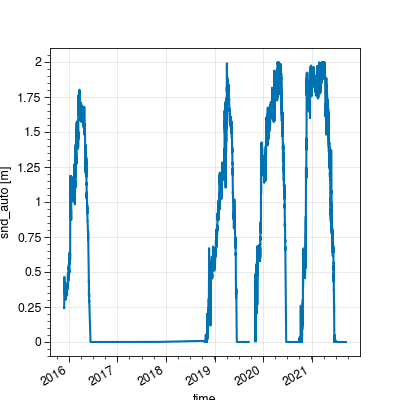

In [14]:
%matplotlib widget

ds_forest.where( (ds_forest.time < pd.to_datetime('2019-09-15')) | \
                 (ds_forest.time > pd.to_datetime('2019-11-01')) & \
                 (ds_forest.time < pd.to_datetime('2021-09-15')) ).snd_auto.plot()

In [15]:
ds_forest = ds_forest.where( (ds_forest.time < pd.to_datetime('2019-09-15')) | \
                 (ds_forest.time > pd.to_datetime('2019-11-01')) & \
                 (ds_forest.time < pd.to_datetime('2021-09-15')) )
ds_forest.snd_auto.attrs['history'] = """Remove wrong calibration values (personal communication, F. Domine, 2024): 
                 ds_forest = ds_forest.where( (ds_forest.time < pd.to_datetime('2019-09-15')) | 
                 (ds_forest.time > pd.to_datetime('2019-11-01')) & 
                 (ds_forest.time < pd.to_datetime('2021-09-15')) )"""

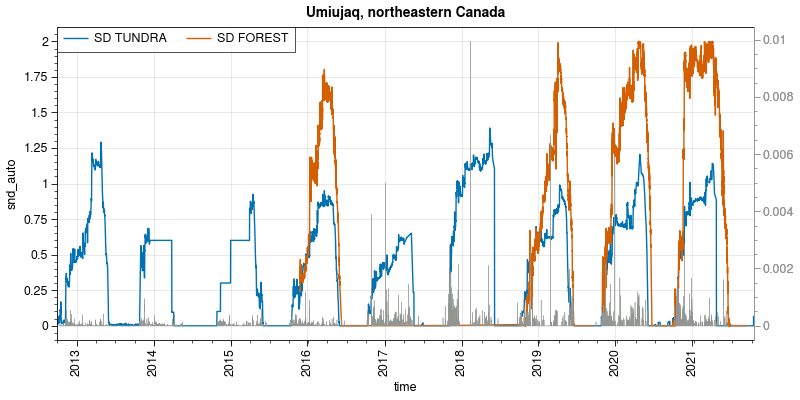

In [16]:
%matplotlib widget
fig, axs = pplt.subplots(figsize=(8,4))

period=slice('2019-09', '2019-12')

ax = axs[0]
ax.plot(ds_tundra.snd_auto, label='SD TUNDRA', lw=1)
ax.plot(ds_forest.snd_auto, label='SD FOREST', lw=1)

ox = ax.alty(color='gray')
ox.plot(ds_forcing.Snowf, label='Precip', color='gray', lw=0.2)

# ax.format(xlim=(ds_forcing.sel(time='2019-09-01').time[0], ds_forcing.sel(time='2019-12-01').time[0]),
#          ylim=(0, 1))

# ox.format(ylim=(0, 0.006))
fig.suptitle('Umiujaq, northeastern Canada')

ax.legend()

## Soil temperatures

In [17]:
df_soil = pd.read_csv(path_obs+'/Umiujaq_soil_temp_water.tab', skiprows=29, delimiter='\t', parse_dates=['Date/Time'], index_col=['Date/Time'])
df_soil

,Event,Depth soil [m],vol SWC [m**3/m**3],T soil [°C],Vegetation type
Date/Time,,,,,
2015-09-19 04:00:00,Umiujaq_2015-2021_Forest,0.05,0.2605,7.2,forest
2015-09-19 05:00:00,Umiujaq_2015-2021_Forest,0.05,0.2598,7.1,forest
2015-09-19 06:00:00,Umiujaq_2015-2021_Forest,0.05,0.2595,7.0,forest
2015-09-19 07:00:00,Umiujaq_2015-2021_Forest,0.05,0.2588,6.9,forest
2015-09-19 08:00:00,Umiujaq_2015-2021_Forest,0.05,0.2582,6.9,forest
...,...,...,...,...,...
2021-10-16 14:00:00,Umiujaq_2012-2021_Tundra,0.50,0.0538,7.1,lichen
2021-10-16 15:00:00,Umiujaq_2012-2021_Tundra,0.50,0.0538,7.1,lichen
2021-10-16 16:00:00,Umiujaq_2012-2021_Tundra,0.50,0.0538,7.1,lichen


In [19]:
df_soil_forest = df_soil.where(df_soil['Vegetation type'] == 'forest').dropna()
df_soil_forest

,Event,Depth soil [m],vol SWC [m**3/m**3],T soil [°C],Vegetation type
Date/Time,,,,,
2015-09-19 04:00:00,Umiujaq_2015-2021_Forest,0.05,0.2605,7.2,forest
2015-09-19 05:00:00,Umiujaq_2015-2021_Forest,0.05,0.2598,7.1,forest
2015-09-19 06:00:00,Umiujaq_2015-2021_Forest,0.05,0.2595,7.0,forest
2015-09-19 07:00:00,Umiujaq_2015-2021_Forest,0.05,0.2588,6.9,forest
2015-09-19 08:00:00,Umiujaq_2015-2021_Forest,0.05,0.2582,6.9,forest
...,...,...,...,...,...
2020-09-27 11:00:00,Umiujaq_2015-2021_Forest,0.50,0.2515,6.1,forest
2020-09-27 12:00:00,Umiujaq_2015-2021_Forest,0.50,0.2515,6.1,forest
2020-09-27 13:00:00,Umiujaq_2015-2021_Forest,0.50,0.2515,6.1,forest


In [20]:
df_soil_forest.where(df_soil_forest['Depth soil [m]'] == 0.05).dropna()

,Event,Depth soil [m],vol SWC [m**3/m**3],T soil [°C],Vegetation type
Date/Time,,,,,
2015-09-19 04:00:00,Umiujaq_2015-2021_Forest,0.05,0.2605,7.2,forest
2015-09-19 05:00:00,Umiujaq_2015-2021_Forest,0.05,0.2598,7.1,forest
2015-09-19 06:00:00,Umiujaq_2015-2021_Forest,0.05,0.2595,7.0,forest
2015-09-19 07:00:00,Umiujaq_2015-2021_Forest,0.05,0.2588,6.9,forest
2015-09-19 08:00:00,Umiujaq_2015-2021_Forest,0.05,0.2582,6.9,forest
...,...,...,...,...,...
2020-09-27 11:00:00,Umiujaq_2015-2021_Forest,0.05,0.1761,6.6,forest
2020-09-27 12:00:00,Umiujaq_2015-2021_Forest,0.05,0.1761,6.6,forest
2020-09-27 13:00:00,Umiujaq_2015-2021_Forest,0.05,0.1761,6.7,forest


In [21]:
df_soil_forest_list_swc = []
full_index = df_soil_forest.where(df_soil_forest['Depth soil [m]'] == 0.05).dropna().index
for depth in df_soil_forest['Depth soil [m]'].unique():
    df_soil_forest_list_swc.append(df_soil_forest.where(df_soil_forest['Depth soil [m]'] == depth).dropna() \
                                   .drop(columns=['Event', 'Depth soil [m]', 'Vegetation type'])['vol SWC [m**3/m**3]']\
                                   .reindex(full_index).values)

df_soil_forest_list_tsl = []
for depth in df_soil_forest['Depth soil [m]'].unique():
    df_soil_forest_list_tsl.append(df_soil_forest.where(df_soil_forest['Depth soil [m]'] == depth).dropna() \
                                   .drop(columns=['Event', 'Depth soil [m]', 'Vegetation type'])['T soil [°C]']\
                                   .reindex(full_index).values)

In [22]:
ds_soil_forest = xr.Dataset(
    {
        "swc": (["sdepth", "time"], np.stack(df_soil_forest_list_swc)),
        "tsl": (["sdepth", "time"], np.stack(df_soil_forest_list_tsl)),
    },
    coords={
        "time": full_index.values,
        "sdepth": df_soil_forest['Depth soil [m]'].unique(),
    },
)
ds_soil_forest.swc.attrs = {'name': 'vol SWC', 'unit': 'm**3/m**3'}
ds_soil_forest.tsl.attrs = {'name': 'T soil', 'unit': '°C'}
ds_soil_forest.sdepth.attrs = {'name': 'Depth soil', 'unit': 'm'}

ds_soil_forest

<xarray.Dataset>
Dimensions:  (sdepth: 5, time: 44050)
Coordinates:
  * time     (time) datetime64[ns] 2015-09-19T04:00:00 ... 2020-09-27T15:00:00
  * sdepth   (sdepth) float64 0.05 0.1 0.2 0.3 0.5
Data variables:
    swc      (sdepth, time) float64 0.2605 0.2598 0.2595 ... 0.2512 0.2512
    tsl      (sdepth, time) float64 7.2 7.1 7.0 6.9 6.9 ... 6.1 6.1 6.1 6.1 6.1

In [23]:
ds_forest = ds_forest.merge(ds_soil_forest)
ds_forest

<xarray.Dataset>
Dimensions:   (time: 53338, sdepth: 5)
Coordinates:
  * time      (time) datetime64[ns] 2015-09-19T04:00:00 ... 2021-10-19T13:00:00
  * sdepth    (sdepth) float64 0.05 0.1 0.2 0.3 0.5
Data variables:
    snd_auto  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    swc       (sdepth, time) float64 0.2605 0.2598 0.2595 0.2588 ... nan nan nan
    tsl       (sdepth, time) float64 7.2 7.1 7.0 6.9 6.9 ... nan nan nan nan nan
Attributes:
    event:          Umiujaq_2015-2021_Forest
    link:           https://doi.pangaea.de/10.1594/PANGAEA.964743
    downloaded:     27/02/2024 by Mickaël Lalande
    original_file:  Domine-etal_2024/datasets/Umiujaq_snow_height.tab, Umiuja...

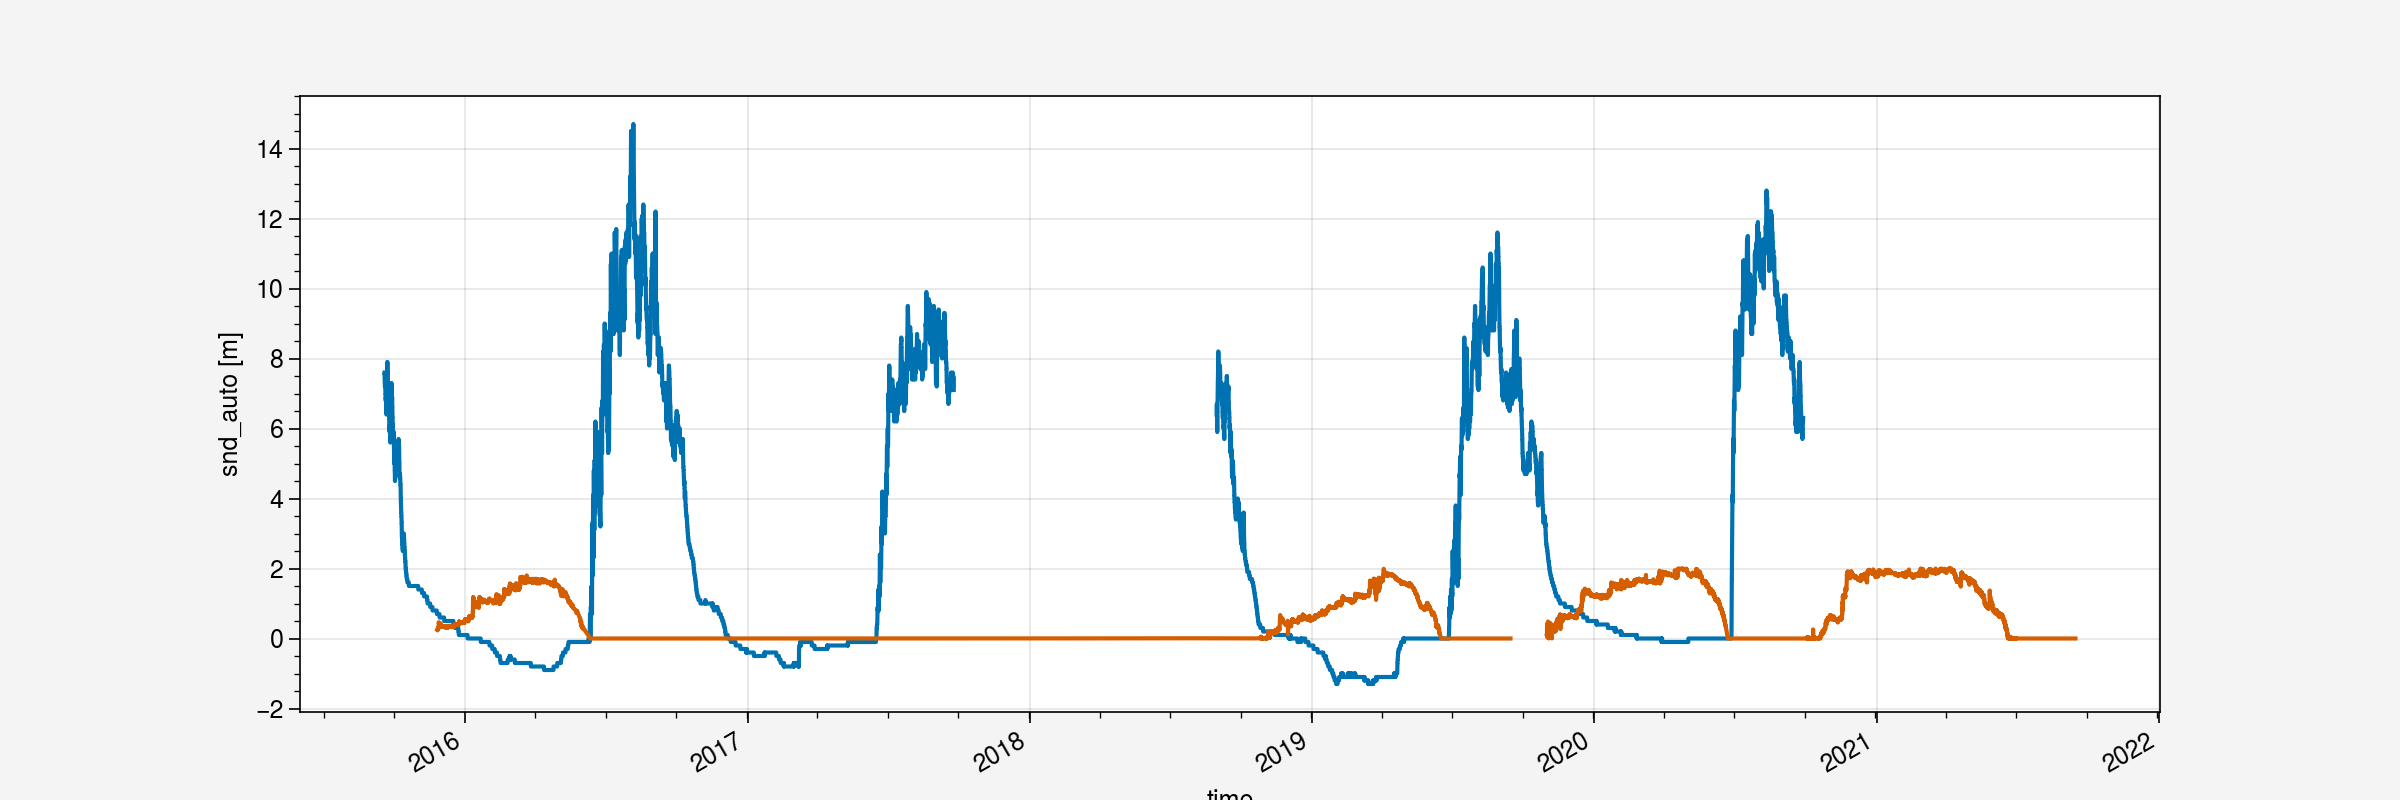

In [25]:
%matplotlib inline
ds_forest.tsl.isel(sdepth=2).plot(figsize=(12, 4))
ds_forest.snd_auto.plot()

### Tundra site

In [27]:
df_soil_lowshrub = df_soil.where(df_soil['Vegetation type'] == 'lowshrub').dropna()
df_soil_lowshrub

,Event,Depth soil [m],vol SWC [m**3/m**3],T soil [°C],Vegetation type
Date/Time,,,,,
2015-09-19 15:00:00,Umiujaq_2012-2021_Tundra,0.09,0.1006,6.2,lowshrub
2015-09-19 16:00:00,Umiujaq_2012-2021_Tundra,0.09,0.1643,6.5,lowshrub
2015-09-19 17:00:00,Umiujaq_2012-2021_Tundra,0.09,0.1643,6.6,lowshrub
2015-09-19 18:00:00,Umiujaq_2012-2021_Tundra,0.09,0.1643,6.6,lowshrub
2015-09-19 19:00:00,Umiujaq_2012-2021_Tundra,0.09,0.1643,6.7,lowshrub
...,...,...,...,...,...
2021-10-16 15:00:00,Umiujaq_2012-2021_Tundra,0.50,0.0721,7.2,lowshrub
2021-10-16 16:00:00,Umiujaq_2012-2021_Tundra,0.50,0.0721,7.2,lowshrub
2021-10-16 17:00:00,Umiujaq_2012-2021_Tundra,0.50,0.0716,7.2,lowshrub


In [28]:
df_soil_forest['Depth soil [m]'].unique()

array([0.05, 0.1 , 0.2 , 0.3 , 0.5 ])

We are going to make a linear interpolation to be able to merge both soil temperatures to same model level

5.00e-02, 1.50e-01, 2.50e-01, 3.50e-01, 4.50e-01, 5.50e-01

In [29]:
# Don't use first level as the obs starts after
model_sdepth = [0.15, 0.25, 0.35, 0.45]

In [30]:
df_soil_lowshrub['Depth soil [m]'].unique()

array([0.09, 0.15, 0.27, 0.39, 0.5 ])

In [32]:
df_soil_lowshrub.where(df_soil_lowshrub['Depth soil [m]'] == 0.39).dropna()

,Event,Depth soil [m],vol SWC [m**3/m**3],T soil [°C],Vegetation type
Date/Time,,,,,
2015-09-19 15:00:00,Umiujaq_2012-2021_Tundra,0.39,0.0477,6.3,lowshrub
2015-09-19 16:00:00,Umiujaq_2012-2021_Tundra,0.39,0.0745,6.9,lowshrub
2015-09-19 17:00:00,Umiujaq_2012-2021_Tundra,0.39,0.0735,6.9,lowshrub
2015-09-19 18:00:00,Umiujaq_2012-2021_Tundra,0.39,0.0730,7.0,lowshrub
2015-09-19 19:00:00,Umiujaq_2012-2021_Tundra,0.39,0.0725,7.0,lowshrub
...,...,...,...,...,...
2021-10-16 15:00:00,Umiujaq_2012-2021_Tundra,0.39,0.0657,7.1,lowshrub
2021-10-16 16:00:00,Umiujaq_2012-2021_Tundra,0.39,0.0657,7.1,lowshrub
2021-10-16 17:00:00,Umiujaq_2012-2021_Tundra,0.39,0.0657,7.1,lowshrub


In [33]:
53258

53258

In [34]:
df_soil_lowshrub_list_swc = []
full_index = df_soil_lowshrub.where(df_soil_lowshrub['Depth soil [m]'] == 0.09).dropna().index
for depth in df_soil_lowshrub['Depth soil [m]'].unique():
    df_soil_lowshrub_list_swc.append(df_soil_lowshrub.where(df_soil_lowshrub['Depth soil [m]'] == depth).dropna() \
                                   .drop(columns=['Event', 'Depth soil [m]', 'Vegetation type'])['vol SWC [m**3/m**3]']\
                                   .reindex(full_index).values)

df_soil_lowshrub_list_tsl = []
for depth in df_soil_lowshrub['Depth soil [m]'].unique():
    df_soil_lowshrub_list_tsl.append(df_soil_lowshrub.where(df_soil_lowshrub['Depth soil [m]'] == depth).dropna() \
                                   .drop(columns=['Event', 'Depth soil [m]', 'Vegetation type'])['T soil [°C]']\
                                   .reindex(full_index).values)

In [35]:
ds_soil_lowshrub = xr.Dataset(
    {
        "mrsll": (["sdepth", "time"], np.stack(df_soil_lowshrub_list_swc)),
        "tsl": (["sdepth", "time"], np.stack(df_soil_lowshrub_list_tsl)),
    },
    coords={
        "time": full_index.values,
        "sdepth": df_soil_lowshrub['Depth soil [m]'].unique(),
    },
)
ds_soil_lowshrub.mrsll.attrs = {'name': 'vol SWC', 'unit': 'm**3/m**3'}
ds_soil_lowshrub.tsl.attrs = {'name': 'T soil', 'unit': '°C'}
ds_soil_lowshrub.sdepth.attrs = {'name': 'Depth soil', 'unit': 'm'}

ds_soil_lowshrub = ds_soil_lowshrub.assign_coords({'veg': 'lowshrub'}).expand_dims('veg')
ds_soil_lowshrub.veg.attrs = {'name': 'Vegetation type'}

ds_soil_lowshrub

<xarray.Dataset>
Dimensions:  (veg: 1, sdepth: 5, time: 53258)
Coordinates:
  * time     (time) datetime64[ns] 2015-09-19T15:00:00 ... 2021-10-16T19:00:00
  * sdepth   (sdepth) float64 0.09 0.15 0.27 0.39 0.5
  * veg      (veg) <U8 'lowshrub'
Data variables:
    mrsll    (veg, sdepth, time) float64 0.1006 0.1643 0.1643 ... 0.0716 0.0716
    tsl      (veg, sdepth, time) float64 6.2 6.5 6.6 6.6 6.7 ... 7.2 7.2 7.2 7.2

In [37]:
df_soil_lichen = df_soil.where(df_soil['Vegetation type'] == 'lichen').dropna()
df_soil_lichen

,Event,Depth soil [m],vol SWC [m**3/m**3],T soil [°C],Vegetation type
Date/Time,,,,,
2015-09-19 15:00:00,Umiujaq_2012-2021_Tundra,0.06,0.1334,6.3,lichen
2015-09-19 16:00:00,Umiujaq_2012-2021_Tundra,0.06,0.1351,6.4,lichen
2015-09-19 17:00:00,Umiujaq_2012-2021_Tundra,0.06,0.1356,6.5,lichen
2015-09-19 18:00:00,Umiujaq_2012-2021_Tundra,0.06,0.1360,6.7,lichen
2015-09-19 19:00:00,Umiujaq_2012-2021_Tundra,0.06,0.1360,6.8,lichen
...,...,...,...,...,...
2021-10-16 14:00:00,Umiujaq_2012-2021_Tundra,0.50,0.0538,7.1,lichen
2021-10-16 15:00:00,Umiujaq_2012-2021_Tundra,0.50,0.0538,7.1,lichen
2021-10-16 16:00:00,Umiujaq_2012-2021_Tundra,0.50,0.0538,7.1,lichen


In [38]:
df_soil_lichen_list_swc = []
full_index = df_soil_lichen.where(df_soil_lichen['Depth soil [m]'] == 0.06).dropna().index
for depth in df_soil_lichen['Depth soil [m]'].unique():
    df_soil_lichen_list_swc.append(df_soil_lichen.where(df_soil_lichen['Depth soil [m]'] == depth).dropna() \
                                   .drop(columns=['Event', 'Depth soil [m]', 'Vegetation type'])['vol SWC [m**3/m**3]']\
                                   .reindex(full_index).values)

df_soil_lichen_list_tsl = []
for depth in df_soil_lichen['Depth soil [m]'].unique():
    df_soil_lichen_list_tsl.append(df_soil_lichen.where(df_soil_lichen['Depth soil [m]'] == depth).dropna() \
                                   .drop(columns=['Event', 'Depth soil [m]', 'Vegetation type'])['T soil [°C]']\
                                   .reindex(full_index).values)

In [39]:
ds_soil_lichen = xr.Dataset(
    {
        "mrsll": (["sdepth", "time"], np.stack(df_soil_lichen_list_swc)),
        "tsl": (["sdepth", "time"], np.stack(df_soil_lichen_list_tsl)),
    },
    coords={
        "time": full_index.values,
        "sdepth": df_soil_lichen['Depth soil [m]'].unique(),
    },
)
ds_soil_lichen.mrsll.attrs = {'name': 'vol SWC', 'unit': 'm**3/m**3'}
ds_soil_lichen.tsl.attrs = {'name': 'T soil', 'unit': '°C'}
ds_soil_lichen.sdepth.attrs = {'name': 'Depth soil', 'unit': 'm'}

ds_soil_lichen = ds_soil_lichen.assign_coords({'veg': 'lichen'}).expand_dims('veg')
ds_soil_lichen.veg.attrs = {'name': 'Vegetation type'}

ds_soil_lichen

<xarray.Dataset>
Dimensions:  (veg: 1, sdepth: 5, time: 53258)
Coordinates:
  * time     (time) datetime64[ns] 2015-09-19T15:00:00 ... 2021-10-16T18:00:00
  * sdepth   (sdepth) float64 0.06 0.12 0.21 0.32 0.5
  * veg      (veg) <U6 'lichen'
Data variables:
    mrsll    (veg, sdepth, time) float64 0.1334 0.1351 0.1356 ... 0.0538 0.0538
    tsl      (veg, sdepth, time) float64 6.3 6.4 6.5 6.7 6.8 ... 7.1 7.1 7.1 7.1

### Interp tundra site to model levels before merging them

In [40]:
ds_soil_lowshrub_interp = ds_soil_lowshrub.interp(sdepth=model_sdepth)
ds_soil_lichen_interp = ds_soil_lichen.interp(sdepth=model_sdepth)

In [41]:
ds_soil_lowshrub.sdepth

<xarray.DataArray 'sdepth' (sdepth: 5)>
array([0.09, 0.15, 0.27, 0.39, 0.5 ])
Coordinates:
  * sdepth   (sdepth) float64 0.09 0.15 0.27 0.39 0.5
Attributes:
    name:     Depth soil
    unit:     m

In [42]:
ds_soil_lowshrub_interp.sdepth

<xarray.DataArray 'sdepth' (sdepth: 4)>
array([0.15, 0.25, 0.35, 0.45])
Coordinates:
  * sdepth   (sdepth) float64 0.15 0.25 0.35 0.45
Attributes:
    name:     Depth soil
    unit:     m

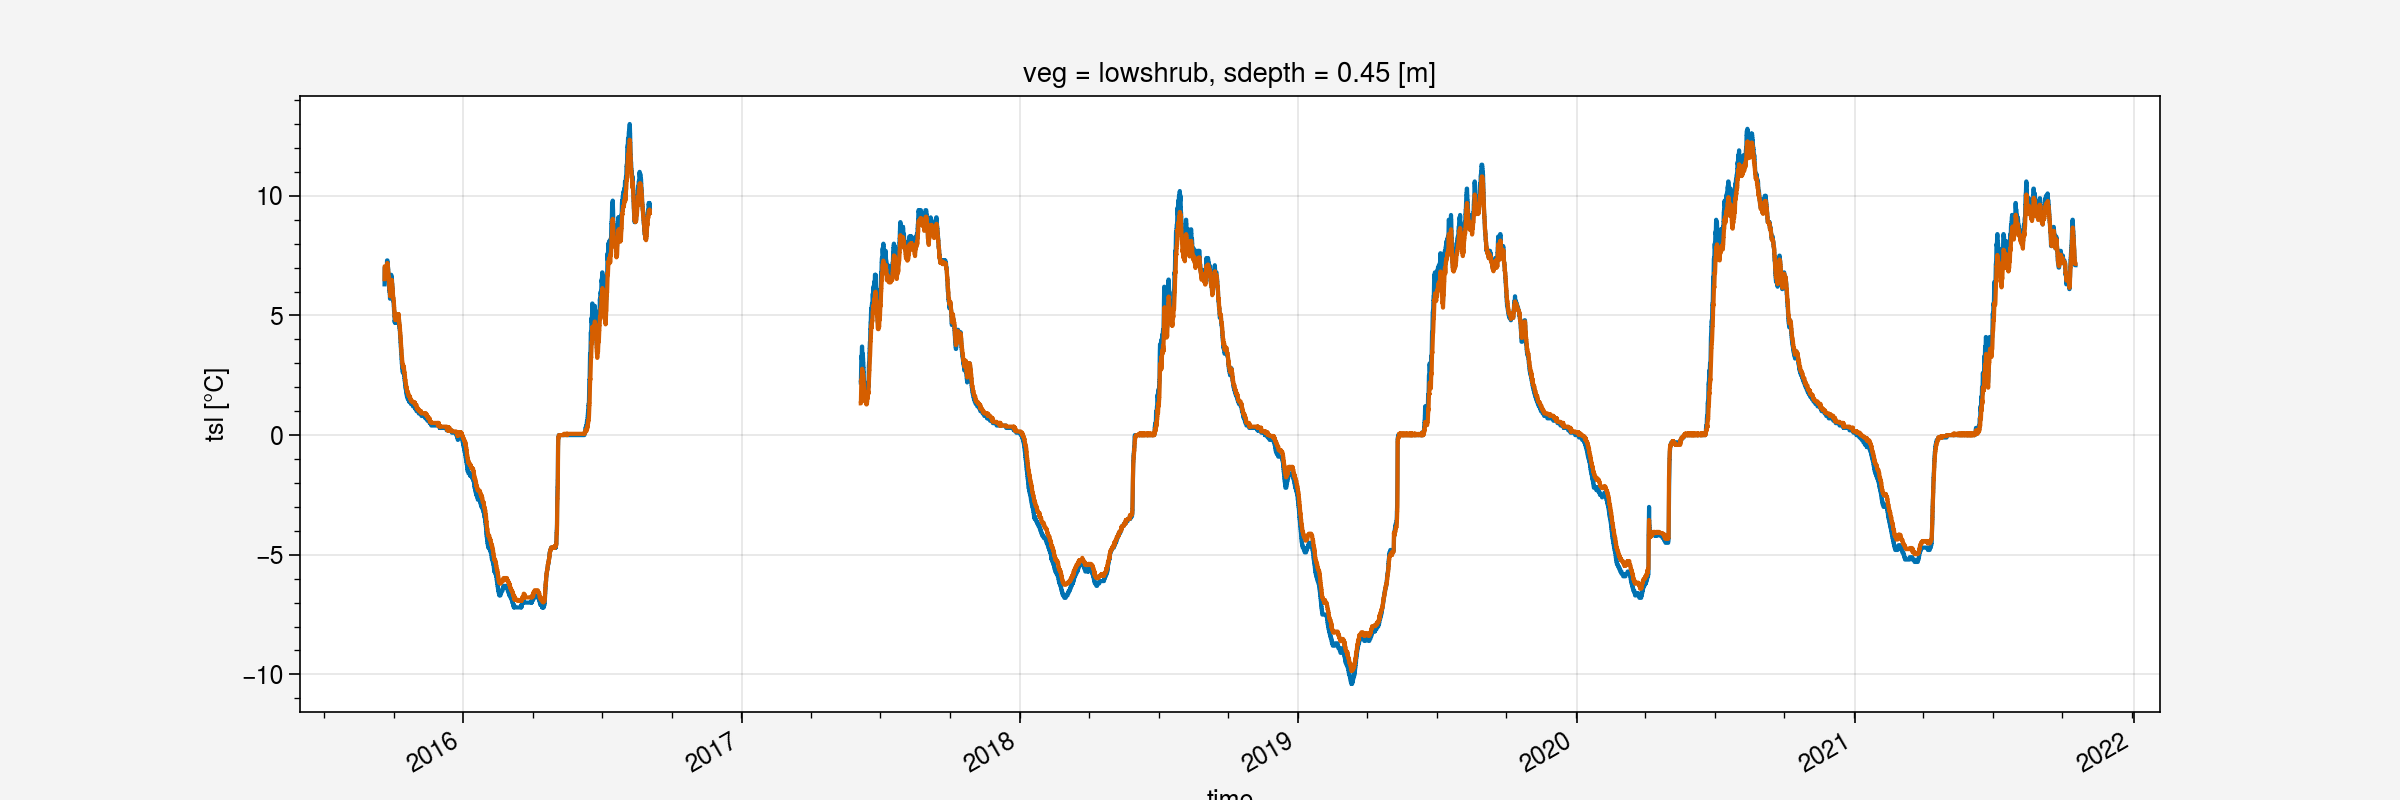

In [43]:
%matplotlib inline
ds_soil_lowshrub.tsl.isel(sdepth=3).plot(figsize=(12, 4))
ds_soil_lowshrub_interp.tsl.isel(sdepth=3).plot()

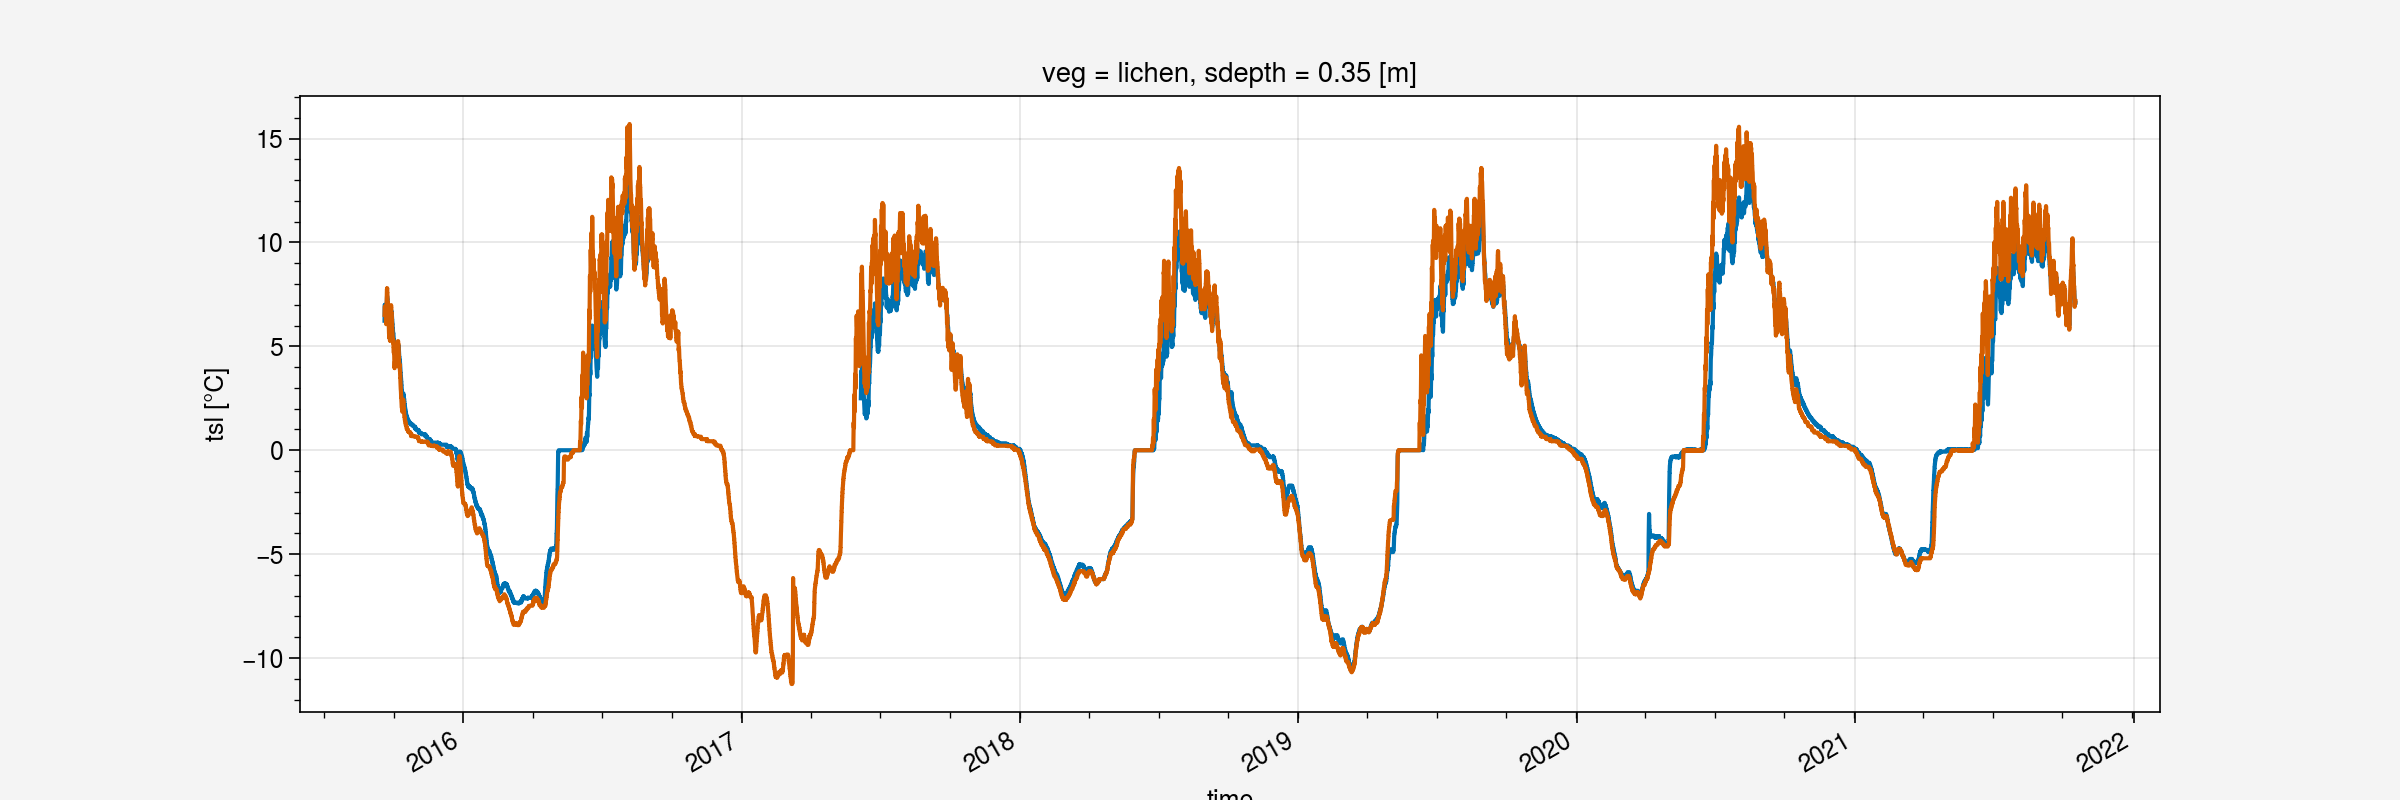

In [44]:
%matplotlib inline
ds_soil_lowshrub_interp.tsl.isel(sdepth=2).plot(figsize=(12, 4))
ds_soil_lichen_interp.tsl.isel(sdepth=2).plot()

## Merge + add albedo?

In [45]:
ds_tundra = ds_tundra.merge((ds_soil_lichen_interp.merge(ds_soil_lowshrub_interp)))
ds_tundra

<xarray.Dataset>
Dimensions:   (time: 79382, veg: 2, sdepth: 4)
Coordinates:
  * time      (time) datetime64[ns] 2012-09-28T21:00:00 ... 2021-10-19T10:00:00
  * veg       (veg) <U8 'lichen' 'lowshrub'
  * sdepth    (sdepth) float64 0.15 0.25 0.35 0.45
Data variables:
    snd_auto  (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0585 0.0579 0.0575 0.0568
    mrsll     (veg, sdepth, time) float64 nan nan nan nan ... nan nan nan nan
    tsl       (veg, sdepth, time) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    event:          Umiujaq_2012-2021_Tundra
    link:           https://doi.pangaea.de/10.1594/PANGAEA.964743
    downloaded:     27/02/2024 by Mickaël Lalande
    original_file:  Domine-etal_2024/datasets/Umiujaq_snow_height.tab, Umiuja...

In [46]:
df_rad_tundra = pd.read_csv(path_obs+'/Umiujaq_rad_tundra.tab', skiprows=31, delimiter='\t', parse_dates=['Date/Time'], index_col=['Date/Time'])
df_rad_tundra

,SWD [W/m**2],QF SWD,SWU [W/m**2],QF SWU,LWD [W/m**2],QF LWD,LWU [W/m**2],QF LWU
Date/Time,,,,,,,,
2012-09-28 21:00:00,36.868,0,3.310,0,325.559,0.0,355.414,0.0
2012-09-28 22:00:00,0.000,0,0.000,0,310.652,0.0,346.563,0.0
2012-09-28 23:00:00,0.000,0,0.000,0,314.352,0.0,338.110,0.0
2012-09-29 00:00:00,0.000,0,0.000,0,310.439,0.0,342.436,0.0
2012-09-29 01:00:00,0.000,0,0.000,0,331.280,0.0,344.852,0.0
...,...,...,...,...,...,...,...,...
2021-10-19 10:00:00,0.000,0,0.000,0,NaN,NaN,NaN,NaN
2021-10-19 11:00:00,5.840,0,0.000,0,NaN,NaN,NaN,NaN
2021-10-19 12:00:00,51.647,0,10.697,0,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Date/Time'>

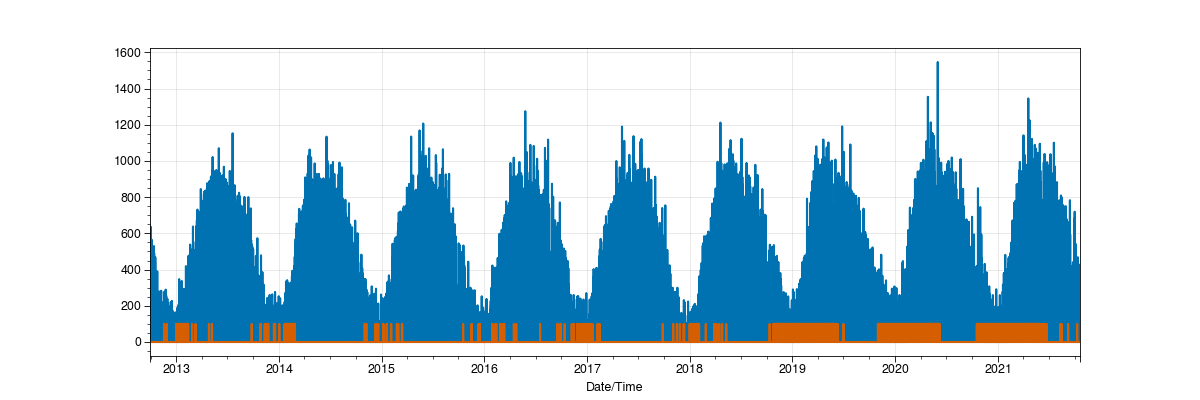

In [47]:
%matplotlib widget
df_rad_tundra['SWD [W/m**2]'].plot(figsize=(12, 4))
(df_rad_tundra['QF SWD']*100).plot()

<AxesSubplot:xlabel='Date/Time'>

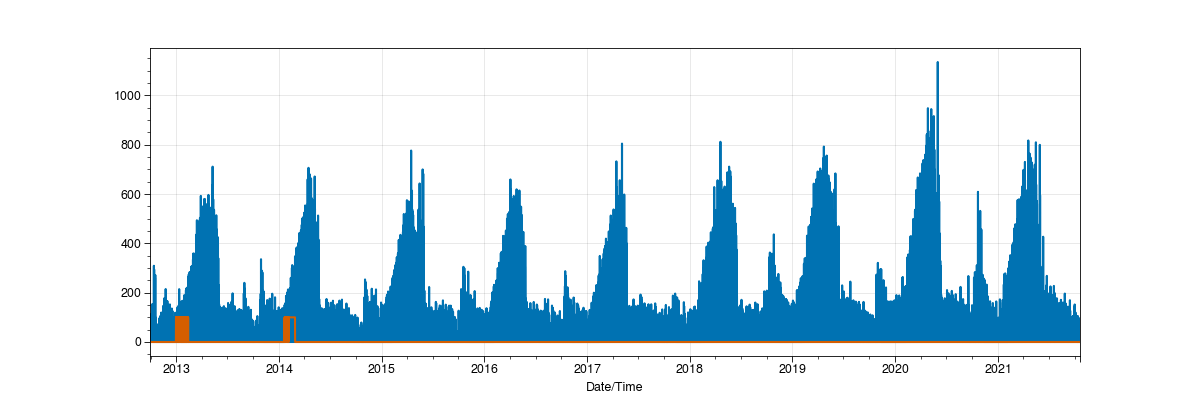

In [48]:
%matplotlib widget
df_rad_tundra['SWU [W/m**2]'].plot(figsize=(12, 4))
(df_rad_tundra['QF SWU']*100).plot()

<AxesSubplot:xlabel='Date/Time'>

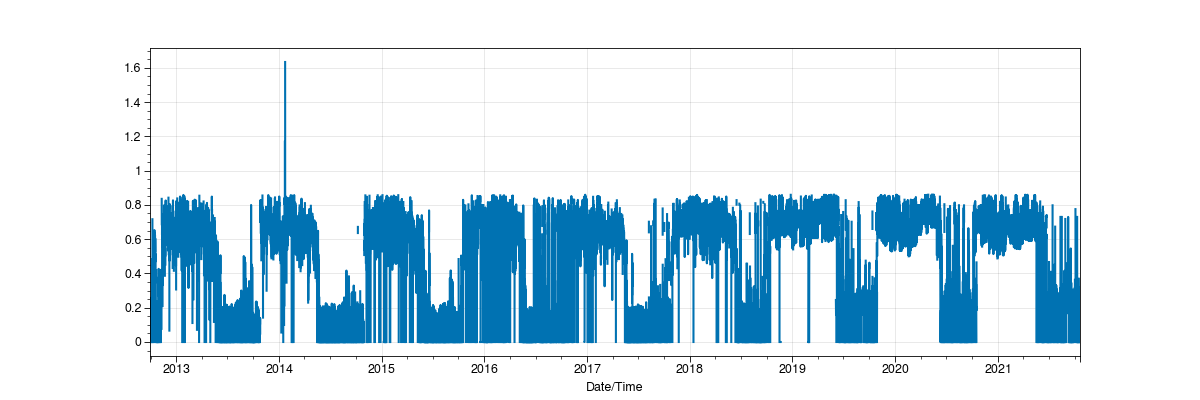

In [49]:
%matplotlib widget
(df_rad_tundra['SWU [W/m**2]'] / df_rad_tundra['SWD [W/m**2]']).plot(figsize=(12, 4))

In [50]:
df_rad_tundra.columns.values[:-1]

array(['SWD [W/m**2]', 'QF SWD', 'SWU [W/m**2]', 'QF SWU', 'LWD [W/m**2]',
       'QF LWD', 'LWU [W/m**2]'], dtype=object)

(380568.0, 380616.0)

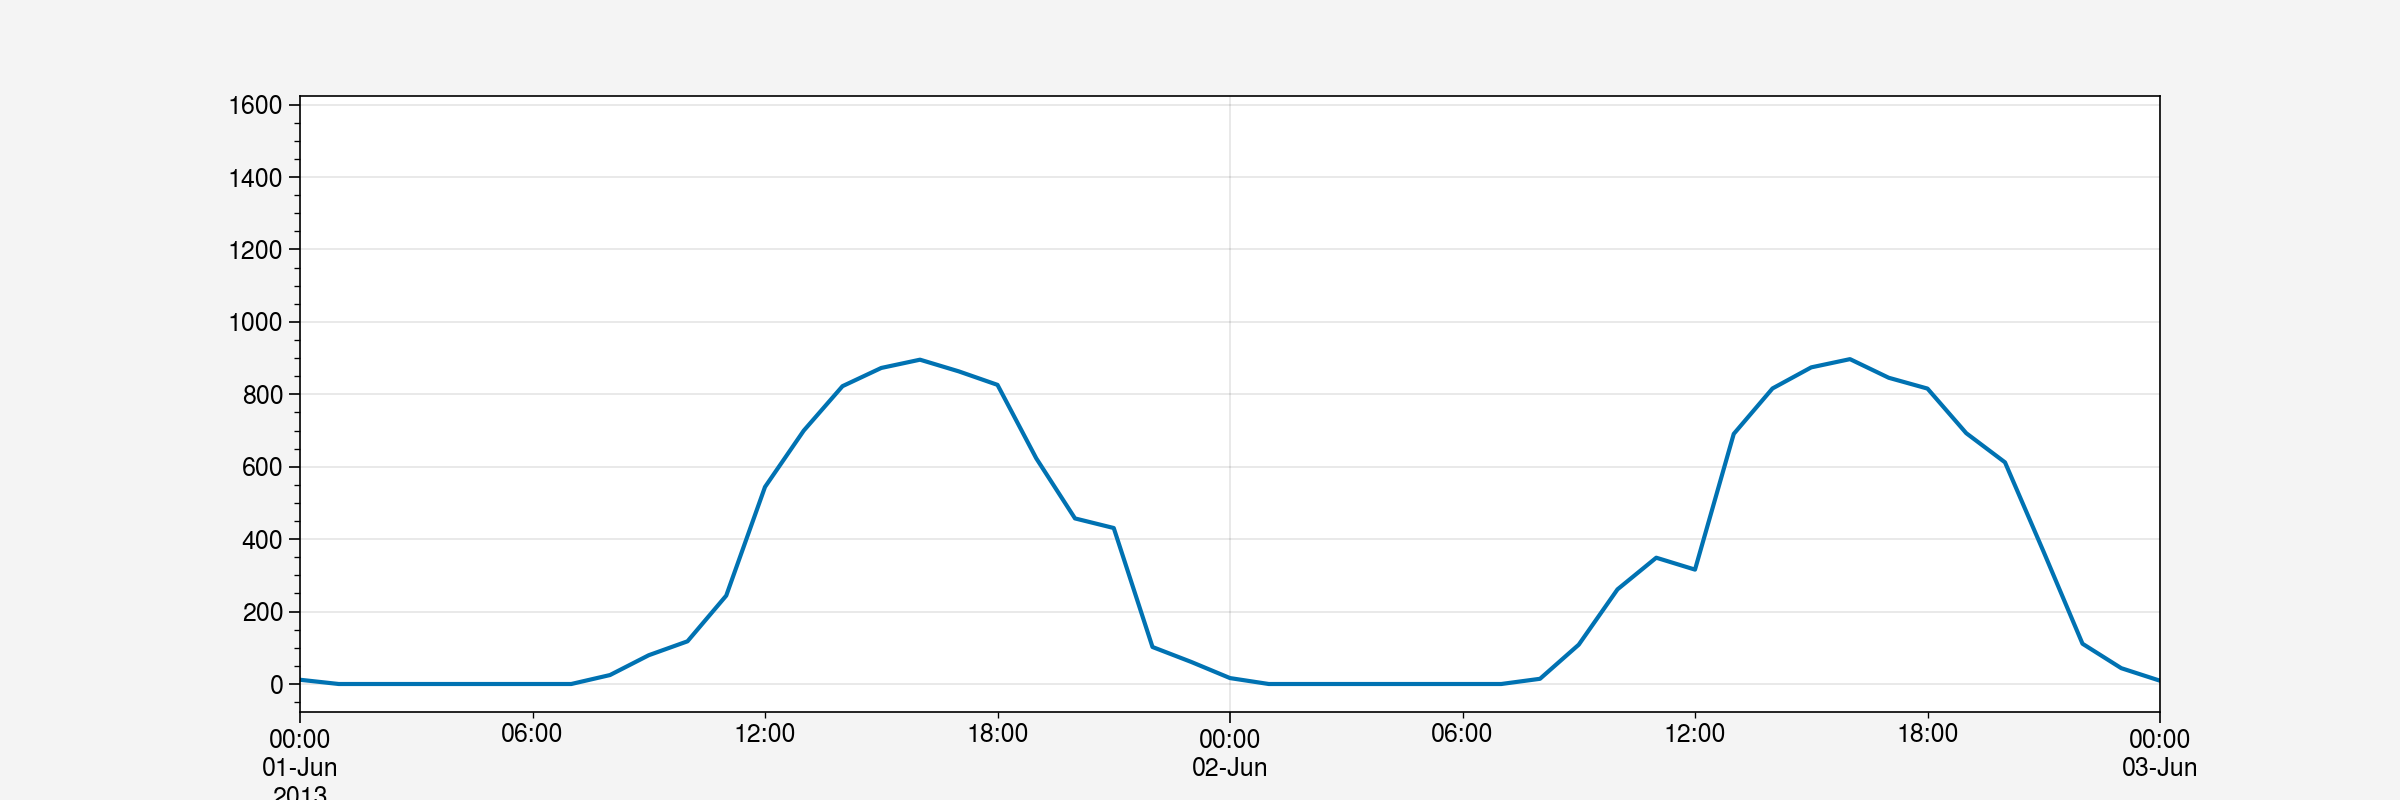

In [51]:
%matplotlib inline
df_rad_tundra['SWD [W/m**2]'].plot(figsize=(12, 4))
plt.xlim('2013-06-01','2013-06-03')

In [52]:
df_rad_tundra['albs'] = df_rad_tundra['SWU [W/m**2]'] / df_rad_tundra['SWD [W/m**2]']
df_alb_tundra = df_rad_tundra.copy()
df_alb_tundra = df_alb_tundra.drop(columns=df_rad_tundra.columns.values[:-1])
df_alb_tundra.index.names = ['time']
df_alb_tundra

,albs
time,
2012-09-28 21:00:00,0.089780
2012-09-28 22:00:00,NaN
2012-09-28 23:00:00,NaN
2012-09-29 00:00:00,NaN
2012-09-29 01:00:00,NaN
...,...
2021-10-19 10:00:00,NaN
2021-10-19 11:00:00,0.000000
2021-10-19 12:00:00,0.207118


In [53]:
ds_alb_tundra = df_alb_tundra.to_xarray()
ds_alb_tundra['albs'].attrs['long_name'] = 'surface albedo'
ds_alb_tundra['albs'].attrs['units'] = '-'
ds_alb_tundra = ds_alb_tundra.where(ds_alb_tundra < 1)
ds_alb_tundra

<xarray.Dataset>
Dimensions:  (time: 79386)
Coordinates:
  * time     (time) datetime64[ns] 2012-09-28T21:00:00 ... 2021-10-19T14:00:00
Data variables:
    albs     (time) float64 0.08978 nan nan nan nan ... 0.0 0.2071 0.2169 0.247

In [54]:
ds_tundra = ds_tundra.merge(ds_alb_tundra)
ds_tundra

<xarray.Dataset>
Dimensions:   (time: 79386, veg: 2, sdepth: 4)
Coordinates:
  * time      (time) datetime64[ns] 2012-09-28T21:00:00 ... 2021-10-19T14:00:00
  * veg       (veg) <U8 'lichen' 'lowshrub'
  * sdepth    (sdepth) float64 0.15 0.25 0.35 0.45
Data variables:
    snd_auto  (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0568 nan nan nan nan
    mrsll     (veg, sdepth, time) float64 nan nan nan nan ... nan nan nan nan
    tsl       (veg, sdepth, time) float64 nan nan nan nan ... nan nan nan nan
    albs      (time) float64 0.08978 nan nan nan nan ... 0.0 0.2071 0.2169 0.247
Attributes:
    event:          Umiujaq_2012-2021_Tundra
    link:           https://doi.pangaea.de/10.1594/PANGAEA.964743
    downloaded:     27/02/2024 by Mickaël Lalande
    original_file:  Domine-etal_2024/datasets/Umiujaq_snow_height.tab, Umiuja...

#### Forest

In [55]:
ds_forest

<xarray.Dataset>
Dimensions:   (time: 53338, sdepth: 5)
Coordinates:
  * time      (time) datetime64[ns] 2015-09-19T04:00:00 ... 2021-10-19T13:00:00
  * sdepth    (sdepth) float64 0.05 0.1 0.2 0.3 0.5
Data variables:
    snd_auto  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    swc       (sdepth, time) float64 0.2605 0.2598 0.2595 0.2588 ... nan nan nan
    tsl       (sdepth, time) float64 7.2 7.1 7.0 6.9 6.9 ... nan nan nan nan nan
Attributes:
    event:          Umiujaq_2015-2021_Forest
    link:           https://doi.pangaea.de/10.1594/PANGAEA.964743
    downloaded:     27/02/2024 by Mickaël Lalande
    original_file:  Domine-etal_2024/datasets/Umiujaq_snow_height.tab, Umiuja...

In [56]:
df_rad_forest = pd.read_csv(path_obs+'/Umiujaq_rad_forest.tab', skiprows=31, delimiter='\t', parse_dates=['Date/Time'], index_col=['Date/Time'])
df_rad_forest

,SWD [W/m**2],QF SWD,SWU [W/m**2],QF SWU,LWD [W/m**2],QF LWD,LWU [W/m**2],QF LWU
Date/Time,,,,,,,,
2015-11-26 08:00:00,0.000,0,0.000,0,295.638,0,285.366,0
2015-11-26 09:00:00,0.000,0,0.000,0,289.122,0,285.610,0
2015-11-26 10:00:00,0.000,0,0.000,0,281.277,0,285.919,0
2015-11-26 11:00:00,0.000,0,0.000,0,286.900,0,288.922,0
2015-11-26 12:00:00,8.706,0,6.906,1,264.778,0,287.333,0
...,...,...,...,...,...,...,...,...
2021-10-14 23:00:00,0.000,0,0.000,0,256.578,0,335.015,0
2021-10-15 00:00:00,0.000,0,0.000,0,262.389,0,333.473,0
2021-10-15 01:00:00,0.000,0,0.000,0,265.666,0,332.072,0


<AxesSubplot:xlabel='Date/Time'>

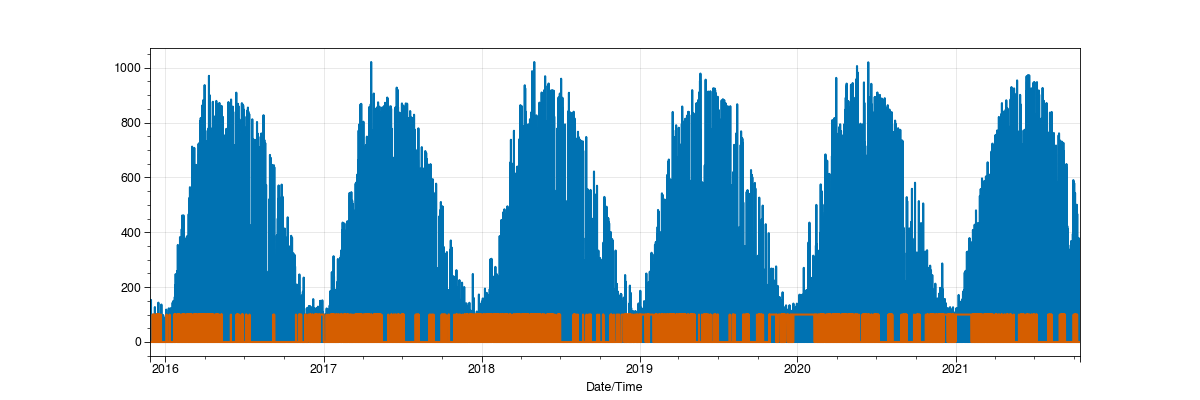

In [57]:
%matplotlib widget
df_rad_forest['SWD [W/m**2]'].plot(figsize=(12, 4))
(df_rad_forest['QF SWD']*100).plot()

<AxesSubplot:xlabel='Date/Time'>

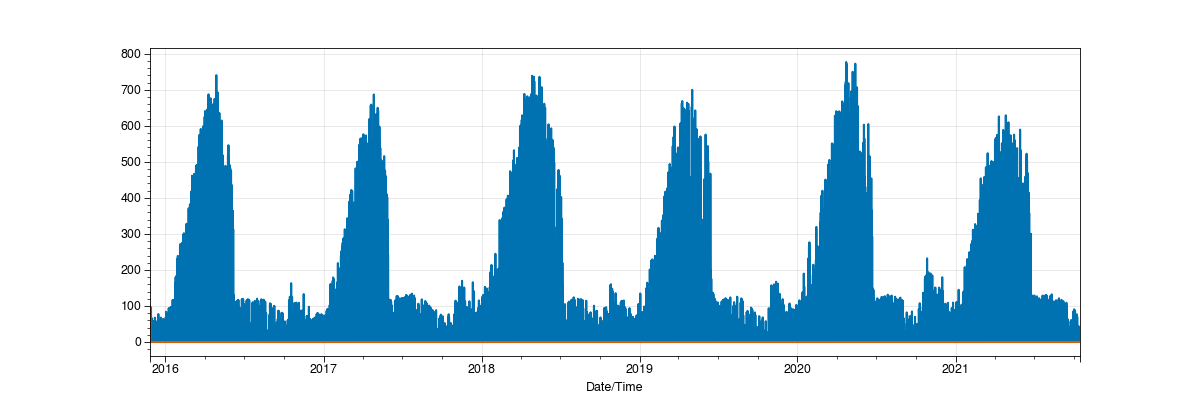

In [58]:
%matplotlib widget
df_rad_forest['SWU [W/m**2]'].plot(figsize=(12, 4))
(df_rad_forest['QF SWU']*100).plot()

<AxesSubplot:xlabel='Date/Time'>

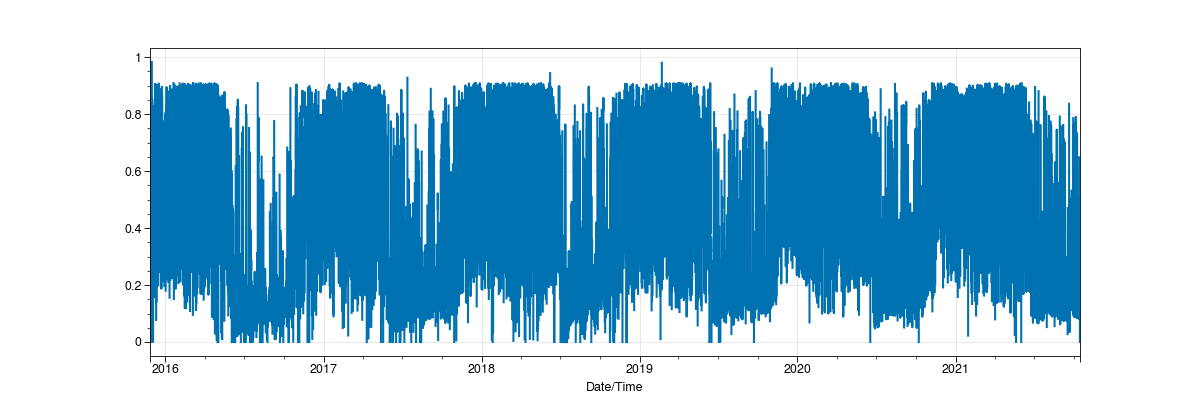

In [59]:
%matplotlib widget
(df_rad_forest['SWU [W/m**2]'] / df_rad_forest['SWD [W/m**2]']).where(
    (df_rad_forest['SWU [W/m**2]'] / df_rad_forest['SWD [W/m**2]']) < 1).plot(figsize=(12, 4))

In [60]:
df_rad_forest.columns.values[:-1]

array(['SWD [W/m**2]', 'QF SWD', 'SWU [W/m**2]', 'QF SWU', 'LWD [W/m**2]',
       'QF LWD', 'LWU [W/m**2]'], dtype=object)

(406872.0, 406920.0)

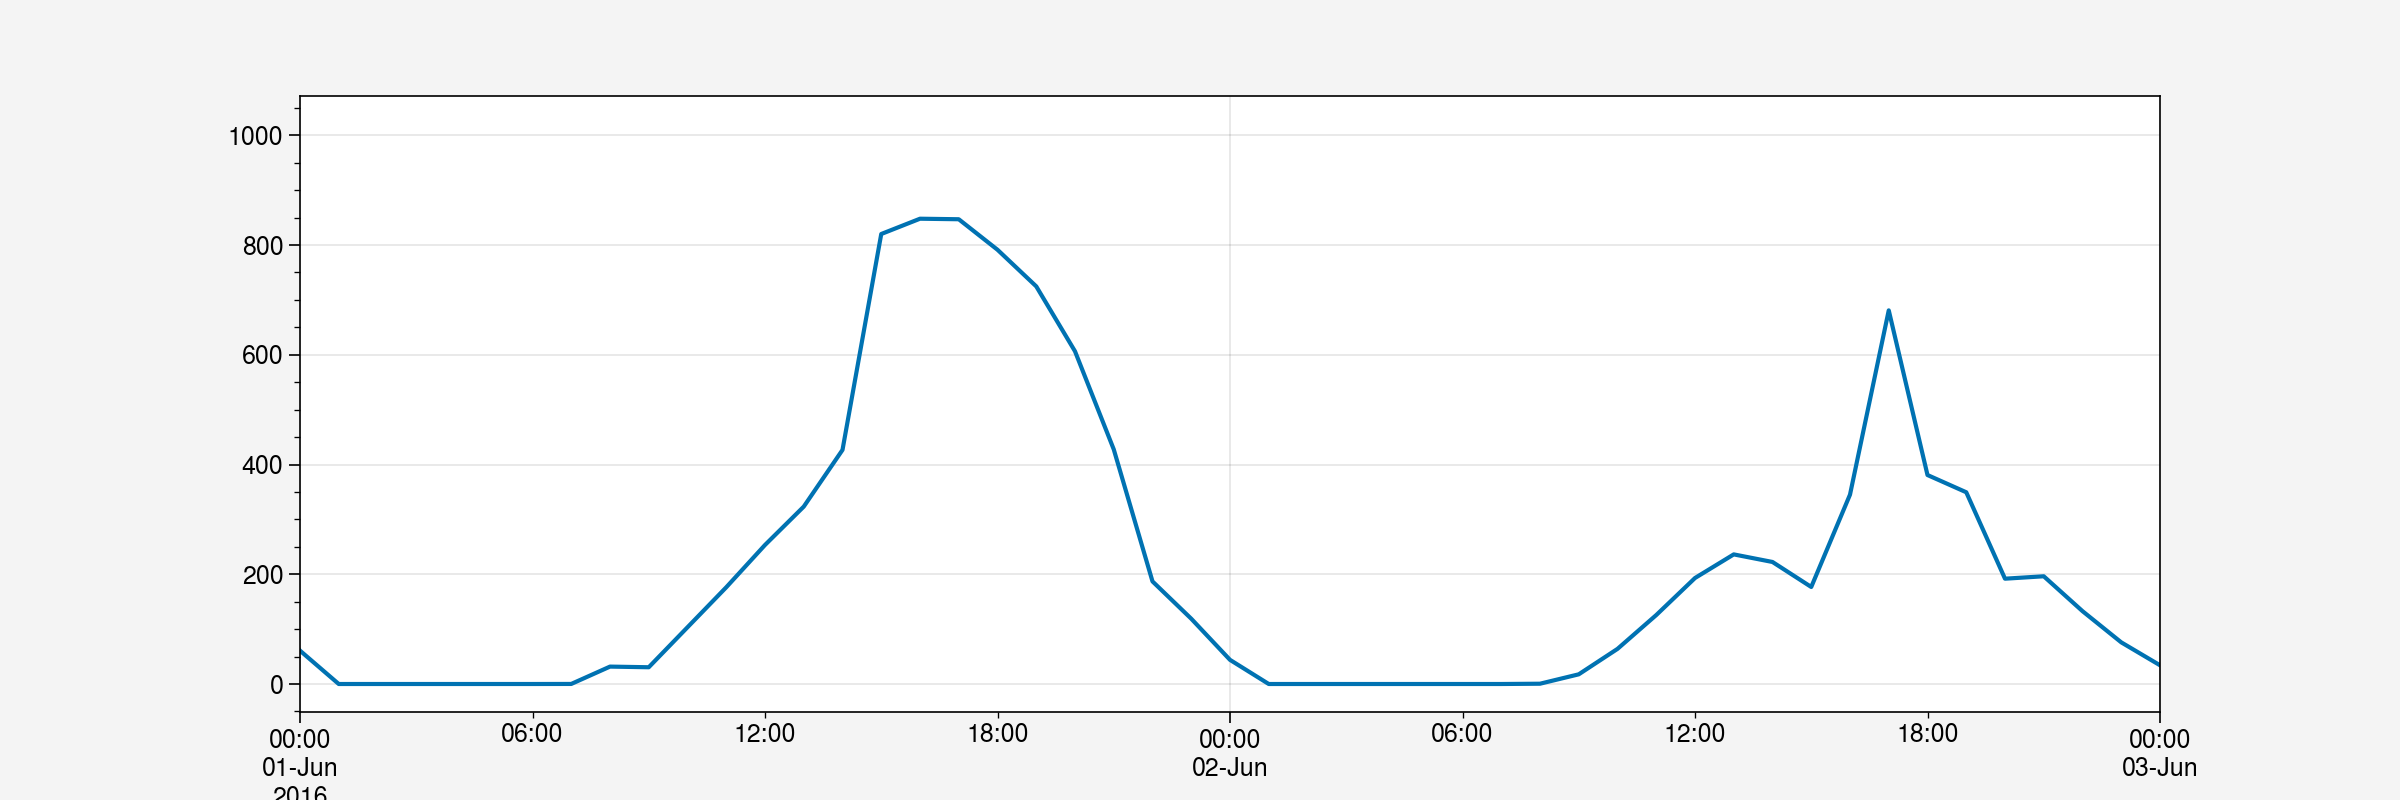

In [61]:
%matplotlib inline
df_rad_forest['SWD [W/m**2]'].plot(figsize=(12, 4))
plt.xlim('2016-06-01','2016-06-03')

In [62]:
df_rad_forest['albs'] = df_rad_forest['SWU [W/m**2]'] / df_rad_forest['SWD [W/m**2]']
df_alb_forest = df_rad_forest.copy()
df_alb_forest = df_alb_forest.drop(columns=df_rad_forest.columns.values[:-1])
df_alb_forest.index.names = ['time']
df_alb_forest

,albs
time,
2015-11-26 08:00:00,NaN
2015-11-26 09:00:00,NaN
2015-11-26 10:00:00,NaN
2015-11-26 11:00:00,NaN
2015-11-26 12:00:00,0.793246
...,...
2021-10-14 23:00:00,NaN
2021-10-15 00:00:00,NaN
2021-10-15 01:00:00,NaN


In [63]:
ds_alb_forest = df_alb_forest.to_xarray()
ds_alb_forest['albs'].attrs['long_name'] = 'surface albedo'
ds_alb_forest['albs'].attrs['units'] = '-'
ds_alb_forest = ds_alb_forest.where(ds_alb_forest < 1)
ds_alb_forest

<xarray.Dataset>
Dimensions:  (time: 51596)
Coordinates:
  * time     (time) datetime64[ns] 2015-11-26T08:00:00 ... 2021-10-15T03:00:00
Data variables:
    albs     (time) float64 nan nan nan nan 0.7932 ... nan nan nan nan nan

In [64]:
ds_forest = ds_forest.merge(ds_alb_forest)
ds_forest

<xarray.Dataset>
Dimensions:   (time: 53338, sdepth: 5)
Coordinates:
  * time      (time) datetime64[ns] 2015-09-19T04:00:00 ... 2021-10-19T13:00:00
  * sdepth    (sdepth) float64 0.05 0.1 0.2 0.3 0.5
Data variables:
    snd_auto  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    swc       (sdepth, time) float64 0.2605 0.2598 0.2595 0.2588 ... nan nan nan
    tsl       (sdepth, time) float64 7.2 7.1 7.0 6.9 6.9 ... nan nan nan nan nan
    albs      (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
Attributes:
    event:          Umiujaq_2015-2021_Forest
    link:           https://doi.pangaea.de/10.1594/PANGAEA.964743
    downloaded:     27/02/2024 by Mickaël Lalande
    original_file:  Domine-etal_2024/datasets/Umiujaq_snow_height.tab, Umiuja...

## Surface temperature

Could get the surface temperature from the LWU. Would need to be looked carefully as I'm worried that with the shrubbs the 
temperature might not be enbterily representative of the snow temperature...

## Go back to local time and save

In [65]:
# Convert the Florent dataset back to local time
# ds_forcing['time'] = pd.to_datetime(ds_forcing.time.values).tz_localize('UTC').tz_convert('America/Toronto').tz_localize(None)
ds_tundra_local = ds_tundra.copy()
ds_forest_local = ds_forest.copy()

ds_tundra_local['time'] = pd.to_datetime(ds_tundra.time.values) - pd.Timedelta(hours=4) # to avoid the day light savings adjustment
ds_forest_local['time'] = pd.to_datetime(ds_forest.time.values) - pd.Timedelta(hours=4) # to avoid the day light savings adjustment

(16937.0, 16938.0)

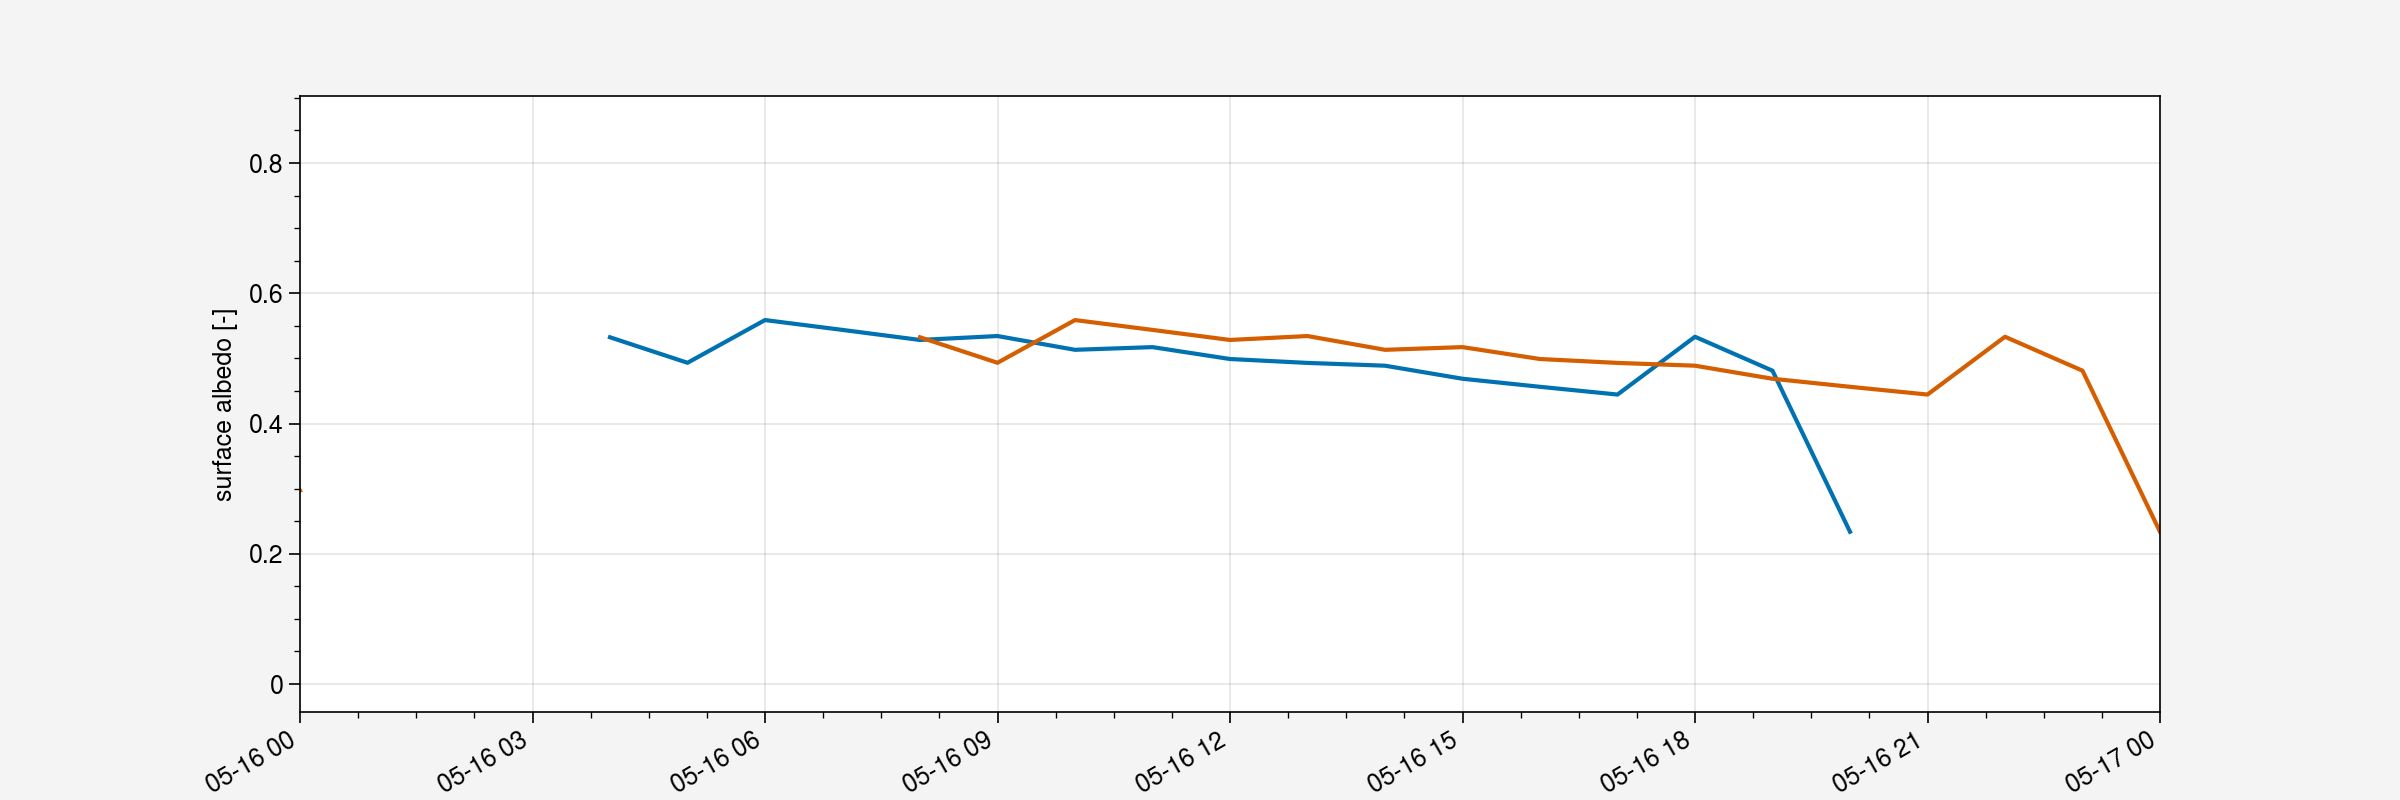

In [78]:
%matplotlib inline
ds_tundra_local.albs.plot(figsize=(12, 4))
ds_tundra.albs.plot()
plt.xlim(pd.to_datetime('2016-05-16'),pd.to_datetime('2016-05-17'))

(16937.0, 16938.0)

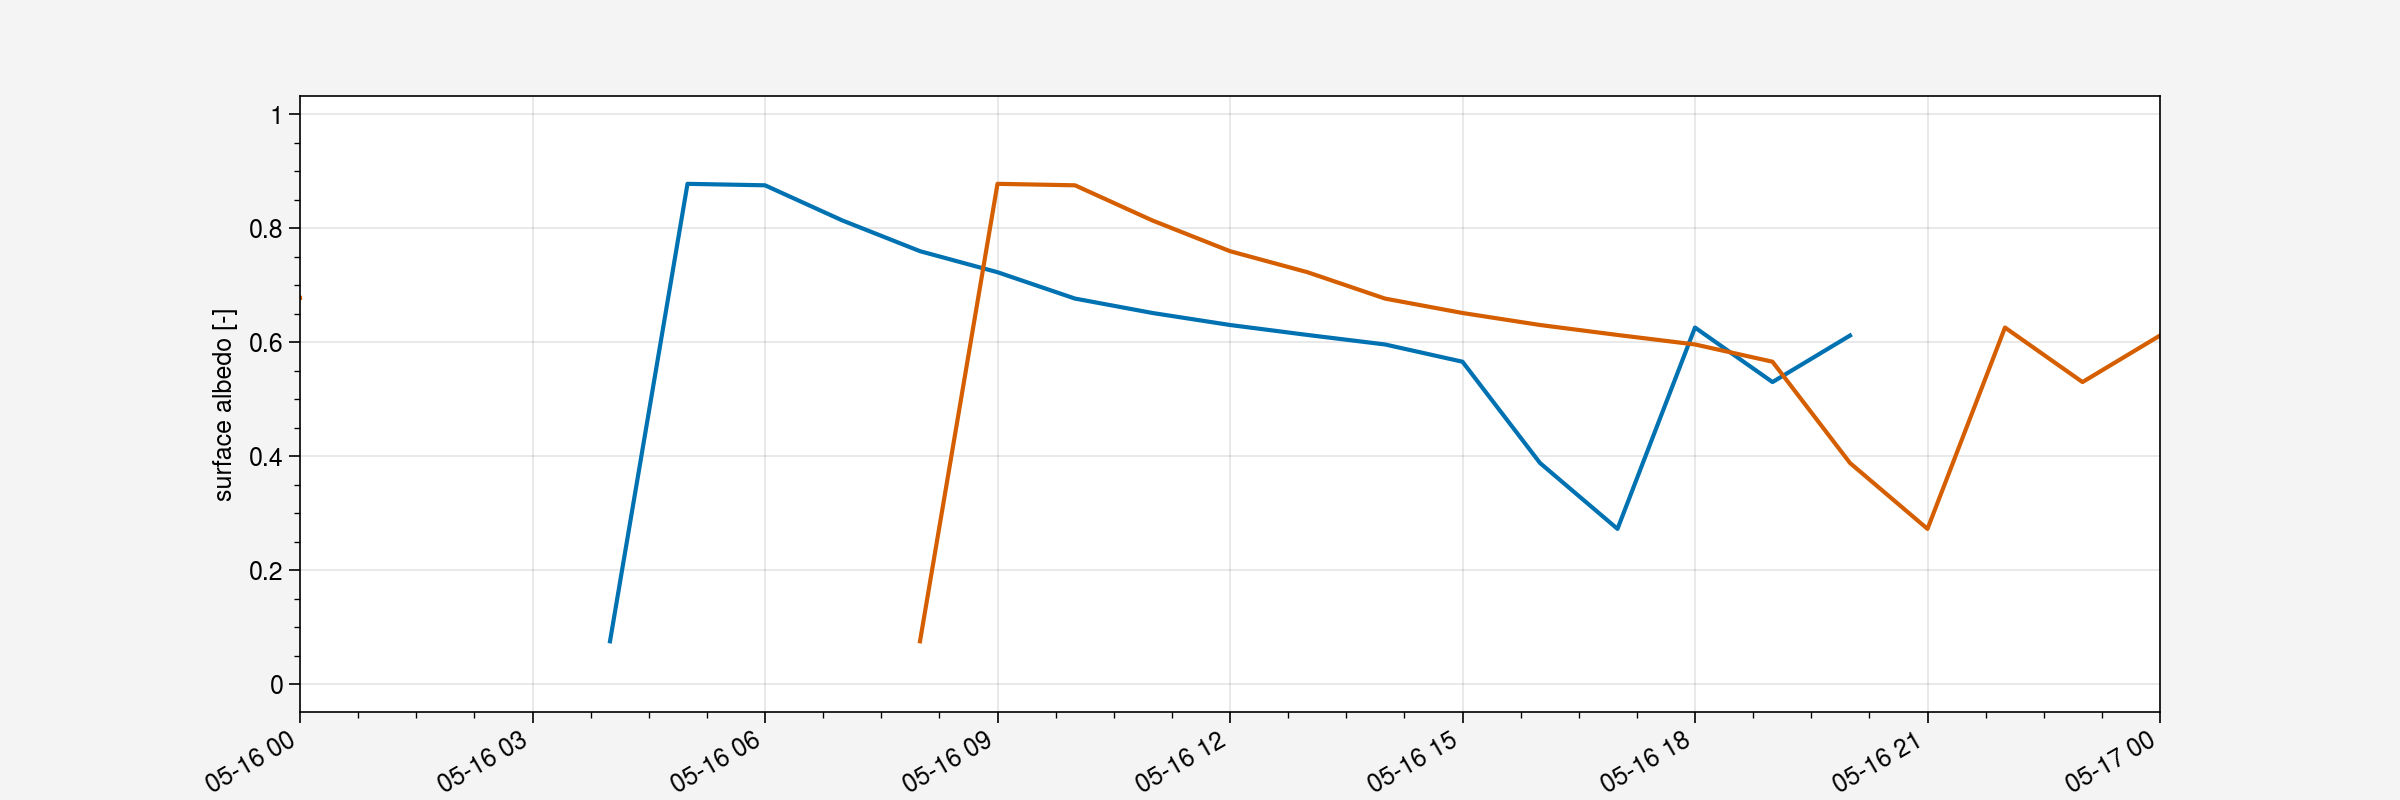

In [79]:
%matplotlib inline
ds_forest_local.albs.plot(figsize=(12, 4))
ds_forest.albs.plot()
plt.xlim(pd.to_datetime('2016-05-16'),pd.to_datetime('2016-05-17'))

In [80]:
path_obs

'/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Umiujaq/Domine-etal_2024/datasets'

In [81]:
ds_forest_local.time

<xarray.DataArray 'time' (time: 53338)>
array(['2015-09-19T00:00:00.000000000', '2015-09-19T01:00:00.000000000',
       '2015-09-19T02:00:00.000000000', ..., '2021-10-19T07:00:00.000000000',
       '2021-10-19T08:00:00.000000000', '2021-10-19T09:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-09-19 ... 2021-10-19T09:00:00

In [82]:
ds_tundra_local.time

<xarray.DataArray 'time' (time: 79386)>
array(['2012-09-28T17:00:00.000000000', '2012-09-28T18:00:00.000000000',
       '2012-09-28T19:00:00.000000000', ..., '2021-10-19T08:00:00.000000000',
       '2021-10-19T09:00:00.000000000', '2021-10-19T10:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2012-09-28T17:00:00 ... 2021-10-19T10:00:00

In [84]:
ds_forest_local.to_netcdf(path_obs+'/obs_insitu_umf_2015_2021.nc')
ds_tundra_local.to_netcdf(path_obs+'/obs_insitu_umt_2012_2021.nc')